  ##                      VADER ANALYSIS 

In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer #Package for the vader method of sentiment analysis
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #Package for wordcloud to see most occcuring words


In [2]:
#READ the dataset
data = pd.read_csv("omicron1.csv")
data.head(5)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1.491840e+18,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,18/05/2015 20:52,49,11,803,False,10/02/2022 18:22,Daily US Confirmed Covid Cases by County For M...,NaN,smcapplication,0,0,False
1,1.491840e+18,Gatherer Thompson,Corporate,I'm with the people who are with everyone. A s...,10/05/2009 23:01,639,1931,46369,False,10/02/2022 18:21,@Yascha_Mounk #CDC says number of fully #vacci...,"['CDC', 'vaccinated', 'Omicron', 'hospital']",Twitter Web App,0,0,False
2,1.491840e+18,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,18/05/2015 20:52,49,11,803,False,10/02/2022 18:20,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,0,0,False
3,1.491840e+18,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,18/05/2015 20:52,49,11,803,False,10/02/2022 18:19,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,2,1,False
4,1.491840e+18,Brownyard Group,"Bay Shore, NY",We offer liability coverage for the Security G...,08/12/2009 16:41,375,284,61,False,10/02/2022 18:19,With the #Beijing2022 #WinterOlympics already ...,"['Beijing2022', 'WinterOlympics', 'olympians',...",Agorapulse app,0,0,False


In [3]:
data["hashtags"].head(3)

0                                             NaN
1    ['CDC', 'vaccinated', 'Omicron', 'hospital']
2                                             NaN
Name: hashtags, dtype: object

In [4]:
# see = []
# str(hash1) for hash1 in set(data["hashtags"]):
#     if hash1 == :
#         see.append(hash1)
#     see.extend(hash1)
# print(see.head(7))
# def clean(hashtag):
#     hashtag = re.sub('','None', hashtag)
#     text = str(text).lower()
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#     text = re.sub('\n', '', text)
#     text = re.sub('\w*\d\w*', '', text)
#     text = [word for word in text.split(' ') if word not in stopword]
#     text=" ".join(text)
#     text = [stemmer.stem(word) for word in text.split(' ')]
#     text=" ".join(text)
#     return hashtag
# data22 = data["hashtags_filled"].apply(clean)
# print(data["hashtags_filled"].head(3))
# print(data["hashtags"].head(3))

In [5]:
data["hashtags_filled"]= data["hashtags"].fillna('None') # Fill NaN with None
#Clean HASHTAGS to get new values that will be useful for chart
def Convert(hashtag1):
    hashtag1 = re.sub('[\[\]\.*?<.*?>+\'\,]','',hashtag1)
    split_hashtag1= hashtag1.split(" ")
    return split_hashtag1
data["hashtags_new"] = data["hashtags_filled"].apply(Convert)
data["hashtags_new"].loc[10:20]
# words_list

10                                 [None]
11    [Covid, pandemic, Ukraine, Omicron]
12                 [COVID, EuropeanUnion]
13                                 [None]
14                                 [None]
15                                 [None]
16                                 [None]
17                     [Omicron, Covid19]
18                                 [None]
19                         [voc, omicron]
20                                 [None]
Name: hashtags_new, dtype: object

In [6]:
## Cleans the words in the hashtag and put in a set, so that we can reference it.

words_list = []
rough = []
def Converted():
    for hashtag in data["hashtags_new"]:
        if isinstance(hashtag, list):
            for words in hashtag:
                words_list.append(words)
#                 for letters in words:
        else:
            words_list.append(hashtag)
    return words_list
Converted()
set_list = set(words_list)
# set_list

##Rank hashtags then use top ten to check for hashtags

In [7]:
# def Sorted_hashtag():
#     if isinstance(hashtag1, list):
#         if hashtag1 is in set_list:
#             hashtag1 =  

In [8]:
#Check data for missing values
data.isna().sum()
# from the summary; user_loaction, user_description, hashtags all have missing values

id                     0
user_name              0
user_location       3612
user_description    1330
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            6827
source                 0
retweets               0
favorites              0
is_retweet             0
hashtags_filled        0
hashtags_new           0
dtype: int64

In [9]:
# nen1= data["hashtags"].values.tolist()
# nen2 = " ".join(i for i in data.hashtags.apply(str))
# print(nen2)
# print(" ")
# data["hashtags"].head(5)

In [10]:
data.head(3)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,hashtags_filled,hashtags_new
0,1.491840e+18,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,18/05/2015 20:52,49,11,803,False,10/02/2022 18:22,Daily US Confirmed Covid Cases by County For M...,NaN,smcapplication,0,0,False,None,[None]
1,1.491840e+18,Gatherer Thompson,Corporate,I'm with the people who are with everyone. A s...,10/05/2009 23:01,639,1931,46369,False,10/02/2022 18:21,@Yascha_Mounk #CDC says number of fully #vacci...,"['CDC', 'vaccinated', 'Omicron', 'hospital']",Twitter Web App,0,0,False,"['CDC', 'vaccinated', 'Omicron', 'hospital']","[CDC, vaccinated, Omicron, hospital]"
2,1.491840e+18,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,18/05/2015 20:52,49,11,803,False,10/02/2022 18:20,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,0,0,False,None,[None]


In [11]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\PASTOR
[nltk_data]     AMEH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

In [13]:
data["text"]

0        daili us confirm covid case counti     covid i...
1        yaschamounk cdc say number fulli vaccin omicro...
2        daili us confirm covid case counti la     covi...
3        daili us confirm covid case counti la     covi...
4         winterolymp alreadi underway us olympian look...
                               ...                        
17041    us head back offic environ here articl call  w...
17042    long time it great feel watch  live intern cri...
17043    newzealand longcovidkid mask ventil school pol...
17044    patient coinfect differ variant yes common pos...
17045    dcyellowcab pay via electron payment contactle...
Name: text, Length: 17046, dtype: object

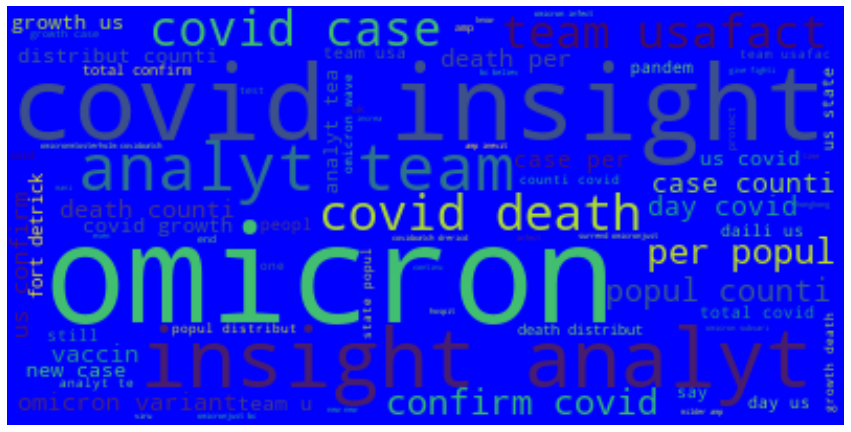

In [14]:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="blue").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

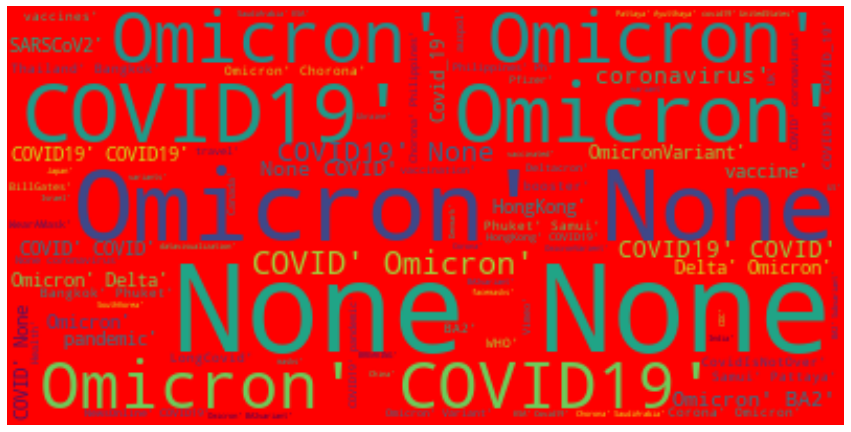

In [15]:
tested = " ".join(i for i in data.hashtags_filled)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="red").generate(tested)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
data1 = data[["text", "Positive", "Negative", "Neutral"]]
print(data1.head())

[nltk_data] Downloading package vader_lexicon to C:\Users\PASTOR
[nltk_data]     AMEH\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                text  Positive  Negative  \
0  daili us confirm covid case counti     covid i...     0.000       0.0   
1  yaschamounk cdc say number fulli vaccin omicro...     0.126       0.0   
2  daili us confirm covid case counti la     covi...     0.000       0.0   
3  daili us confirm covid case counti la     covi...     0.000       0.0   
4   winterolymp alreadi underway us olympian look...     0.000       0.0   

   Neutral  
0    1.000  
1    0.874  
2    1.000  
3    1.000  
4    1.000  


In [17]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [18]:
new = data[["Positive","Negative","Neutral"]]
new["Score"] = new[["Positive","Negative","Neutral"]].max(axis =1)
new

C:\Users\PASTOR AMEH\AppData\Local\Temp\ipykernel_12508\4104977337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new["Score"] = new[["Positive","Negative","Neutral"]].max(axis =1)


,Positive,Negative,Neutral,Score
0,0.000,0.000,1.000,1.000
1,0.126,0.000,0.874,0.874
2,0.000,0.000,1.000,1.000
3,0.000,0.000,1.000,1.000
4,0.000,0.000,1.000,1.000
...,...,...,...,...
17041,0.184,0.000,0.816,0.816
17042,0.382,0.000,0.618,0.618
17043,0.000,0.000,1.000,1.000
17044,0.231,0.000,0.769,0.769


In [19]:
def Follower_List(followers):
    if followers <= 1000:
        followers = 1000
    elif followers <= 10000 and followers > 1000:
        followers = 10000
    elif followers <= 50000 and followers > 10000:
        followers = 50000
    else:
        followers = 100000
    return followers
data["followers_sorted"] = data["user_followers"].apply(Follower_List)
data["followers_sorted"]

0         1000
1         1000
2         1000
3         1000
4         1000
         ...  
17041     1000
17042     1000
17043    50000
17044    50000
17045    10000
Name: followers_sorted, Length: 17046, dtype: int64

Positive            Negative             Neutral          
                      mean       std      mean       std      mean       std
followers_sorted                                                            
1000              0.082959  0.132792  0.083477  0.130641  0.833464  0.172254
10000             0.066458  0.117777  0.069140  0.128445  0.864404  0.165082
50000             0.060710  0.114642  0.065255  0.123520  0.874034  0.158396
100000            0.048929  0.102310  0.057937  0.116655  0.893131  0.146949

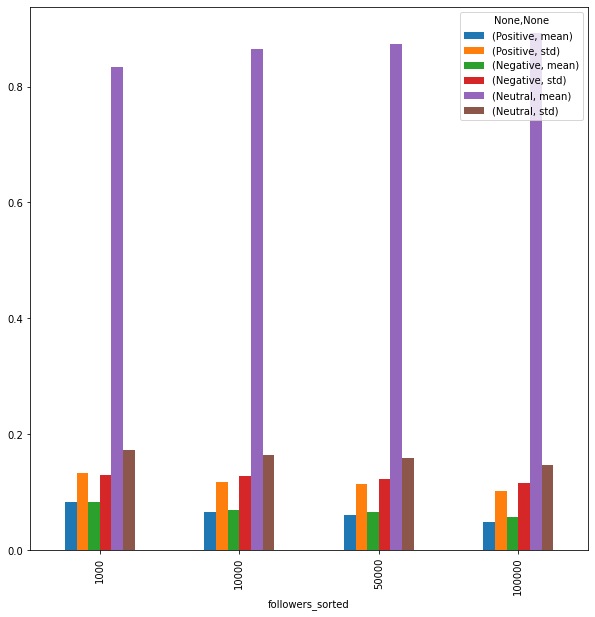

In [20]:
check = ["Positive", "Negative", "Neutral"]
# nest = ['line','bar','barh','hist','box','kde','density','area','pie','scatter','hexbin']
nest1 = ["mean", "std"]
new1= data.groupby("followers_sorted")[check].agg(nest1)
new1.plot(kind = "bar",figsize= (10,10))
new1

In [21]:
# data[["Positive","Negative"]].plot(kind = "bar")
# plt.plot(data["Positive"], data["Neutral"], 'b')
# plt.plot(data["Positive"], data["Neutral"], 'r')
# plt.ylabel("Negative Neutral")
# plt.xlabel("Positive")
# plt.legend(["Negative", 'Neutral'])
# plt.show

,Positive,Negative,Neutral
followers_sorted,,,
1000,0.082959,0.083477,0.833464
10000,0.066458,0.069140,0.864404
50000,0.060710,0.065255,0.874034
100000,0.048929,0.057937,0.893131


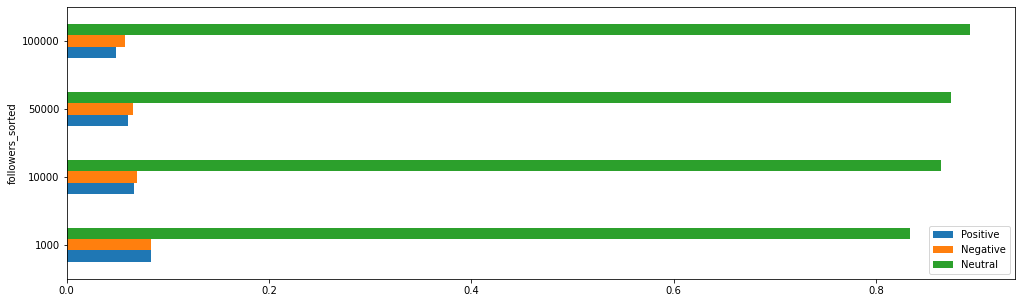

In [22]:
check = ["Positive", "Negative", "Neutral"]
nest = ["mean"]
new1= data.groupby("followers_sorted")[check].mean()
new1.plot(kind = "barh", figsize= (17,5))
new1

In [23]:
score_list_score = []
def sentiment_score_set():
#     score_list_score = []
    for a,b,c in zip(data["Positive"].values,data["Negative"].values,data["Neutral"].values):
        if a>b and a>c:
            score1 = "Positive"
#             score_list_score.append(score1)
        elif b>a and b>c:
            score1 = "Negative"
#             score_list_score.append(score1)
        else:
            score1 = "Neutral"
        score_list_score.append(score1)
    data["Score1"] = score_list_score

sentiment_score_set()
# data["Score1"] = sentiment_score_set(x,y,z)
set(score_list_score)

{'Negative', 'Neutral', 'Positive'}

In [24]:
data[["Positive","Negative","Neutral"]].values

array([[0.   , 0.   , 1.   ],
       [0.126, 0.   , 0.874],
       [0.   , 0.   , 1.   ],
       ...,
       [0.   , 0.   , 1.   ],
       [0.231, 0.   , 0.769],
       [0.   , 0.123, 0.877]])

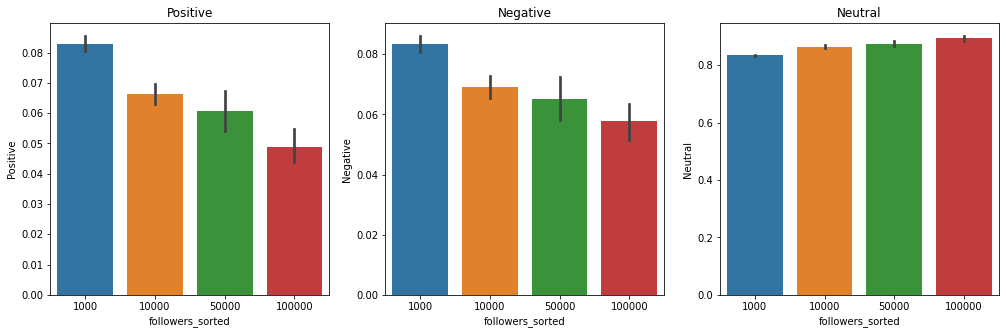

In [25]:
fig, axs = plt.subplots(1, 3, figsize= (17,5))
sns.barplot(data = data, x="followers_sorted", y= data["Positive"], ax = axs[0])
sns.barplot(data = data, x="followers_sorted", y= data["Negative"], ax = axs[1])
sns.barplot(data = data, x="followers_sorted", y= data["Neutral"], ax = axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Negative")
axs[2].set_title("Neutral")
plt.show()

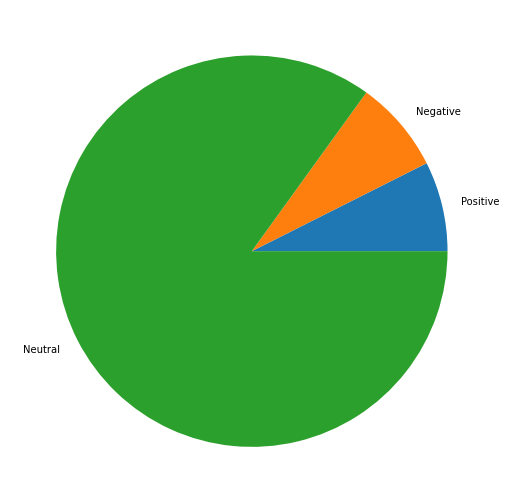

In [26]:
fig1 = plt.figure(figsize =(12, 9))
lists = ["Positive", "Negative", "Neutral"]
values1 = [sum(data["Positive"]), sum(data["Negative"]), sum(data["Neutral"])]
plt.pie(values1, labels =lists)
plt.show()

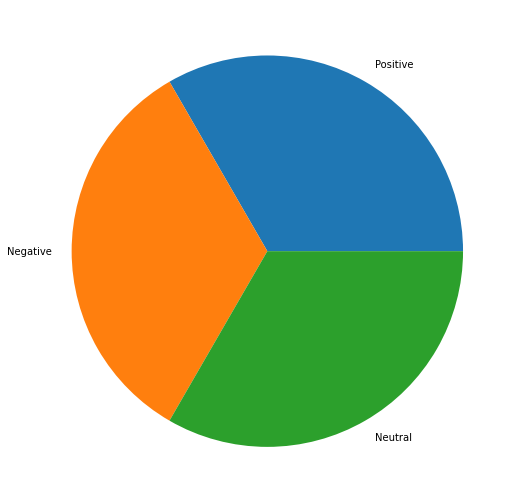

In [27]:
fig1 = plt.figure(figsize =(12, 9))
lists = ["Positive", "Negative", "Neutral"]
values1 = [len([data[data["Score1"]=="Positive"]["followers_sorted"]]), len([data[data["Score1"]=="Negative"]["followers_sorted"]]),len([data[data["Score1"]=="Neutral"]["followers_sorted"]])]
plt.pie(values1, labels =lists)
plt.show()

## Roberta Pretrained Model

In [28]:
!pip install transformers
!pip3 install https://download.pytorch.org/whl/cpu/torch-1.0.1-cp36-cp36m-win_amd64.whl
!pip3 install torchvisio

ERROR: torch-1.0.1-cp36-cp36m-win_amd64.whl is not a supported wheel on this platform.
ERROR: Could not find a version that satisfies the requirement torchvisio (from versions: none)
ERROR: No matching distribution found for torchvisio


In [29]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

C:\Users\PASTOR AMEH\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [30]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)

In [31]:
!pip install https://download.pytorch.org/whl/cpu/torch-1.0.1-cp36-cp36m-win_amd64.whl
!pip install torchvision

ERROR: torch-1.0.1-cp36-cp36m-win_amd64.whl is not a supported wheel on this platform.


In [32]:
import torch

ModuleNotFoundError: No module named 'torch'

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
# encoded_text = tokenizer(tested, return_tensors='pt')
# output = model(**encoded_text)
# scores = output[0][0].detach().numpy()
# scores = softmax(scores)
# scores_dict = {
#     'roberta_neg' : scores[0],
#     'roberta_neu' : scores[1],
#     'roberta_pos' : scores[2]
# }
# print(scores_dict)

In [ ]:
data.head()

In [ ]:
example = "This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

In [ ]:
def polarity_scores_roberta(test_robert):
    encoded_text = tokenizer(test_robert, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    return scores

In [ ]:
# data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
# data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
# data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]

data["Roberta_NEG"]= [polarity_scores_roberta(i)[0] for i in data["text"]]
data["Roberta_NEU"]= [polarity_scores_roberta(i)[1] for i in data["text"]]
data["Roberta_POS"]= [polarity_scores_roberta(i)[2] for i in data["text"]]
data.columns

In [ ]:
fig1 = plt.figure(figsize =(12, 9))
lists = ["Positive", "Negative", "Neutral"]
values1 = [len([data[data["Score1"]=="Positive"]["followers_sorted"]]), len([data[data["Score1"]=="Negative"]["followers_sorted"]]),len([data[data["Score1"]=="Neutral"]["followers_sorted"]])]
plt.pie(values1, labels =lists)
plt.show()

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score